## Introduction to Streamlit


In [ ]:
#### streamlit is an open-source app framework for Machine Learning and Data Science teams.it allows you to create beautiful web apps in minutes.for more information visit https://streamlit.io/

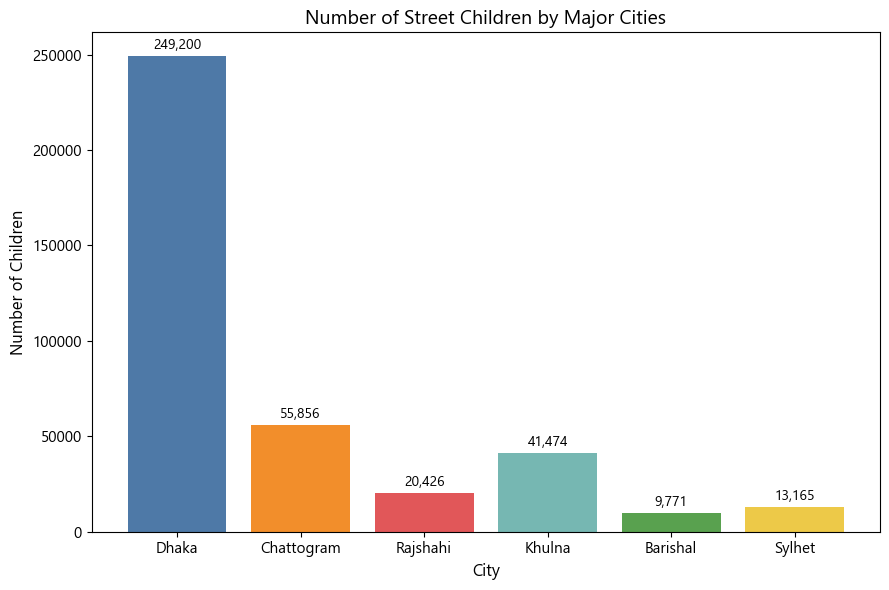

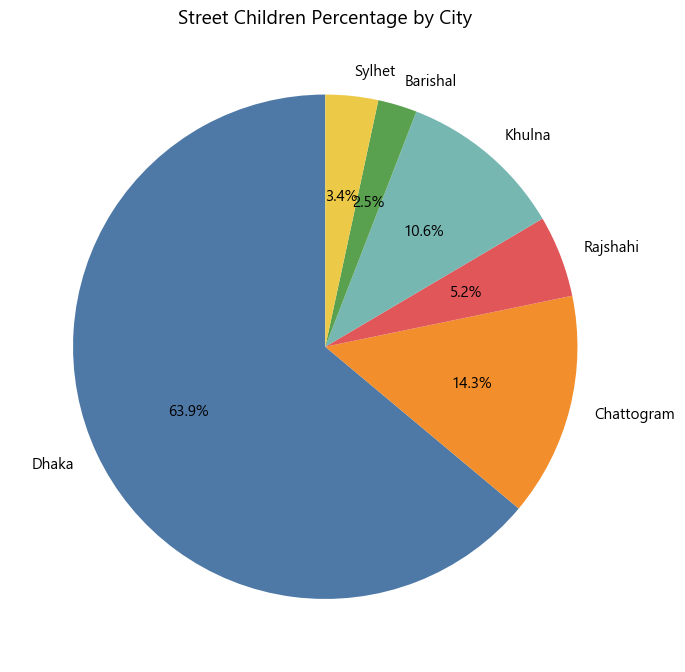

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# --- Data (Street Children by Major Cities) ---
data = {
    "City": ["Dhaka", "Chattogram", "Rajshahi", "Khulna", "Barishal", "Sylhet"],
    "Children_Count": [249200, 55856, 20426, 41474, 9771, 13165],
}

df = pd.DataFrame(data)

# Calculate total & percentage
total = df["Children_Count"].sum()
df["Percentage"] = (df["Children_Count"] / total * 100).round(2)

# --- Save Table as CSV ---
df.to_csv("street_children_table_english.csv", index=False)

# --- Bar Chart ---
plt.figure(figsize=(9, 6))
bars = plt.bar(
    df["City"], df["Children_Count"], 
    color=["#4E79A7","#F28E2B","#E15759","#76B7B2","#59A14F","#EDC948"]
)
plt.title("Number of Street Children by Major Cities", fontsize=14)
plt.xlabel("City", fontsize=12)
plt.ylabel("Number of Children", fontsize=12)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)

# Annotate each bar with value
for bar in bars:
    yval = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width()/2, yval + 2000, f"{yval:,}", 
        ha="center", va="bottom", fontsize=10
    )

plt.tight_layout()
plt.savefig("street_children_bar_chart_english.png", dpi=300)
plt.show()

# --- Pie Chart ---
plt.figure(figsize=(7,7))
plt.pie(
    df["Children_Count"], labels=df["City"], autopct="%1.1f%%", 
    colors=["#4E79A7","#F28E2B","#E15759","#76B7B2","#59A14F","#EDC948"],
    textprops={"fontsize":11}, startangle=90
)
plt.title("Street Children Percentage by City", fontsize=14)
plt.tight_layout()
plt.savefig("street_children_pie_chart_english.png", dpi=300)
plt.show()


Saved: figures/3_1_design_diagram.png


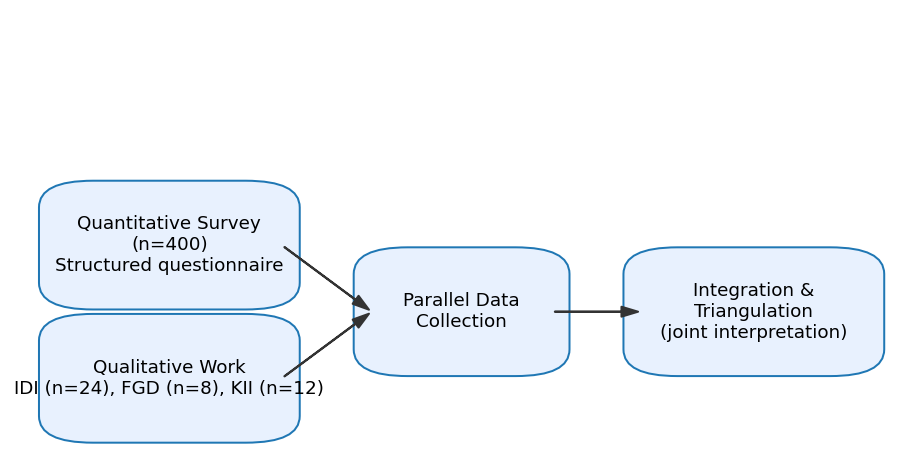

,Component,Details
0,Design,Convergent Mixed-Methods
1,Approach,Parallel quantitative & qualitative strands
2,Quantitative,N≈400; cluster & time-location sampling
3,Qualitative,"IDI=24, FGD=8, KII=12; thematic inquiry"
4,Integration,Joint display & narrative triangulation


Saved: figures/3_2_hotspot_bar.png


C:\Users\efte2\AppData\Local\Temp\ipykernel_17968\3491574520.py:95: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(area_df["Hotspot"], rotation=30, ha="right")


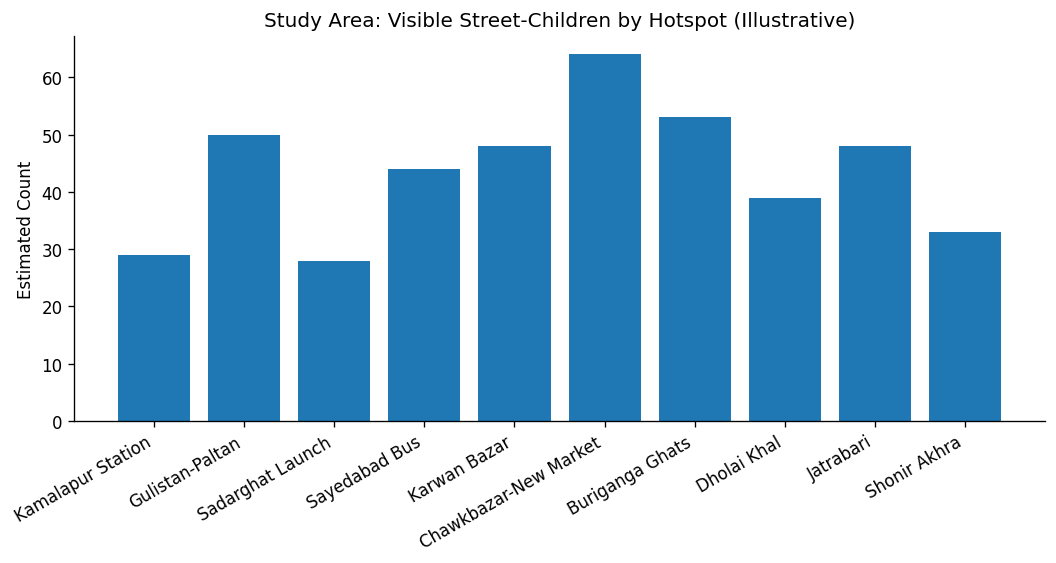

,Hotspot,Estimated_Visible_Children
5,Chawkbazar-New Market,64
6,Buriganga Ghats,53
1,Gulistan-Paltan,50
8,Jatrabari,48
4,Karwan Bazar,48
3,Sayedabad Bus,44
7,Dholai Khal,39
9,Shonir Akhra,33
0,Kamalapur Station,29
2,Sadarghat Launch,28


ValueError: too many values to unpack (expected 2)

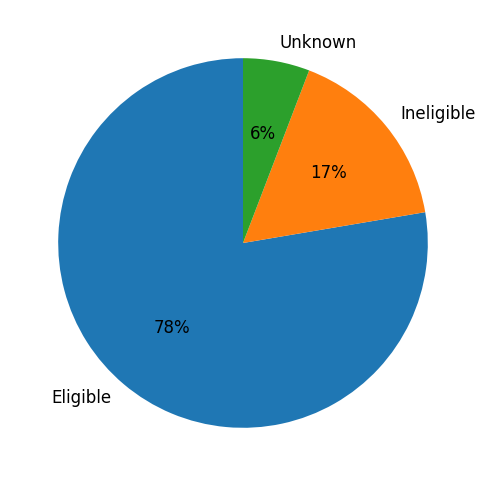

In [2]:
# ==============================
# Chapter 3 – Methodology Visual Pack (3.1–3.14)
# Author: (Your Name)
# Requirements: pandas, numpy, matplotlib
# ==============================

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import FancyBboxPatch, ArrowStyle, FancyArrowPatch
from datetime import datetime, timedelta

# ---------- setup ----------
plt.rcParams["figure.dpi"] = 120
plt.rcParams["axes.spines.top"] = False
plt.rcParams["axes.spines.right"] = False
os.makedirs("figures", exist_ok=True)

# Synthetic hotspots used throughout (replace with your DSCC list when you have it)
hotspots = [
    "Kamalapur Station", "Gulistan-Paltan", "Sadarghat Launch",
    "Sayedabad Bus", "Karwan Bazar", "Chawkbazar-New Market",
    "Buriganga Ghats", "Dholai Khal", "Jatrabari", "Shonir Akhra"
]

# Helper to show and also save every figure
def save_show(fig, name):
    fig.tight_layout()
    path = f"figures/{name}.png"
    fig.savefig(path, bbox_inches="tight")
    print(f"Saved: {path}")
    plt.show()


# =========================================================
# 3.1 Research Design & Approach (Convergent Mixed-Methods)
# =========================================================
# Visual 1: Simple flow diagram (Quant + Qual -> Triangulation)

fig, ax = plt.subplots(figsize=(8, 4))
ax.axis("off")

def rounded_box(ax, xy, w, h, text, fc="#e8f1fe"):
    x, y = xy
    box = FancyBboxPatch((x, y), w, h, boxstyle="round,pad=0.02,rounding_size=0.06",
                         linewidth=1.2, edgecolor="#1f77b4", facecolor=fc)
    ax.add_patch(box)
    ax.text(x + w/2, y + h/2, text, ha="center", va="center", fontsize=11)

# Boxes
rounded_box(ax, (0.05, 0.35), 0.25, 0.25, "Quantitative Survey\n(n=400)\nStructured questionnaire")
rounded_box(ax, (0.05, 0.05), 0.25, 0.25, "Qualitative Work\nIDI (n=24), FGD (n=8), KII (n=12)")
rounded_box(ax, (0.40, 0.20), 0.20, 0.25, "Parallel Data\nCollection")
rounded_box(ax, (0.70, 0.20), 0.25, 0.25, "Integration &\nTriangulation\n(joint interpretation)")

# Arrows
def arrow(ax, p1, p2):
    ax.add_patch(FancyArrowPatch(p1, p2, arrowstyle=ArrowStyle("Simple", head_length=10, head_width=6),
                                 connectionstyle="arc3,rad=0.0", color="#333", linewidth=1.2))
arrow(ax, (0.30, 0.475), (0.40, 0.325))
arrow(ax, (0.30, 0.175), (0.40, 0.325))
arrow(ax, (0.60, 0.325), (0.70, 0.325))

ax.set_xlim(0,1); ax.set_ylim(0,1)
save_show(fig, "3_1_design_diagram")

# Table 3.1 – Design summary
design_tbl = pd.DataFrame({
    "Component": ["Design", "Approach", "Quantitative", "Qualitative", "Integration"],
    "Details": [
        "Convergent Mixed-Methods", 
        "Parallel quantitative & qualitative strands",
        "N≈400; cluster & time-location sampling",
        "IDI=24, FGD=8, KII=12; thematic inquiry",
        "Joint display & narrative triangulation"
    ]
})
display(design_tbl)


# =================================================
# 3.2 Study Area – DSCC Hotspots (Illustrative)
# =================================================
# Fake counts of visible children by hotspot to illustrate
np.random.seed(7)
hotspot_counts = np.random.randint(25, 70, size=len(hotspots))
area_df = pd.DataFrame({"Hotspot": hotspots, "Estimated_Visible_Children": hotspot_counts})

# Bar chart
fig, ax = plt.subplots(figsize=(9, 4.8))
ax.bar(area_df["Hotspot"], area_df["Estimated_Visible_Children"])
ax.set_title("Study Area: Visible Street-Children by Hotspot (Illustrative)")
ax.set_ylabel("Estimated Count")
ax.set_xticklabels(area_df["Hotspot"], rotation=30, ha="right")
save_show(fig, "3_2_hotspot_bar")

display(area_df.sort_values("Estimated_Visible_Children", ascending=False))


# ==============================================================
# 3.3 Population & Eligibility (Inclusion/Exclusion Illustration)
# ==============================================================
eligible = 400
ineligible = 85   # e.g., too young/older/temporary, etc.
unknown = 30      # e.g., could not verify
pop_df = pd.DataFrame({
    "Category": ["Eligible", "Ineligible", "Unknown"],
    "Count": [eligible, ineligible, unknown]
})

# Donut chart
fig, ax = plt.subplots(figsize=(5, 5))
vals = pop_df["Count"].values
labels = pop_df["Category"].values
wedges, _ = ax.pie(vals, labels=labels, autopct="%1.0f%%", startangle=90)
circle = plt.Circle((0,0), 0.6, color="white")
ax.add_artist(circle)
ax.set_title("Eligibility Distribution (Illustrative)")
save_show(fig, "3_3_eligibility_donut")

display(pop_df)


# ===========================================
# 3.4 Sampling Design & Sample Allocation
# ===========================================
# Allocate n=400 across hotspots proportional to counts
area_df["Weight"] = area_df["Estimated_Visible_Children"] / area_df["Estimated_Visible_Children"].sum()
area_df["Allocated_Sample"] = np.round(area_df["Weight"] * 400).astype(int)

fig, ax = plt.subplots(figsize=(9, 4.8))
ax.bar(area_df["Hotspot"], area_df["Allocated_Sample"])
ax.set_title("Allocated Survey Sample by Hotspot (n≈400)")
ax.set_ylabel("Allocated n")
ax.set_xticklabels(area_df["Hotspot"], rotation=30, ha="right")
save_show(fig, "3_4_sample_allocation")

display(area_df[["Hotspot","Allocated_Sample","Weight"]])

# Flow figure (multi-stage sampling)
fig, ax = plt.subplots(figsize=(8, 4))
ax.axis("off")
rounded_box(ax, (0.05, 0.35), 0.25, 0.25, "Stage-1:\nSelect Hotspots\n(Clusters)")
rounded_box(ax, (0.40, 0.35), 0.25, 0.25, "Stage-2:\nTime-Location\nSlots")
rounded_box(ax, (0.75, 0.35), 0.20, 0.25, "Stage-3:\nSystematic\nSelection")
arrow(ax, (0.30, 0.475), (0.40, 0.475))
arrow(ax, (0.65, 0.475), (0.75, 0.475))
save_show(fig, "3_4_sampling_flow")


# =======================================================
# 3.5 Instruments & Variables – Heatmap-style overview
# =======================================================
modules = ["Background","Housing/Safety","Education","Livelihood/Income",
           "Health","Food & Nutrition","Violence/Safeguarding",
           "Mental Health (8-item)","Service Access"]
indicators = [5, 6, 6, 7, 8, 5, 8, 8, 6]  # illustrative indicator counts

inst_df = pd.DataFrame({"Module": modules, "No_of_Indicators": indicators})
display(inst_df)

# Heatmap (matplotlib imshow)
fig, ax = plt.subplots(figsize=(6, 3.8))
heat = np.array(indicators)[None, :]
im = ax.imshow(heat, aspect="auto")
ax.set_xticks(range(len(modules)))
ax.set_xticklabels(modules, rotation=35, ha="right")
ax.set_yticks([])
ax.set_title("Instrument Coverage by Module (Indicator Count)")
for i, val in enumerate(indicators):
    ax.text(i, 0, str(val), ha="center", va="center", color="white", fontsize=11)
save_show(fig, "3_5_instrument_heatmap")


# ==============================================
# 3.6 Field Process – Time/Task & Daily Slots
# ==============================================
# Daily slots plan chart
slots = ["Morning (6–10)", "Midday (10–14)", "Afternoon (14–18)", "Night (22–04)"]
coverage = [6, 7, 6, 10]  # number of planned sessions per slot (illustrative)
proc_df = pd.DataFrame({"Slot": slots, "Sessions_Planned": coverage})

fig, ax = plt.subplots(figsize=(6, 3.5))
ax.bar(slots, coverage)
ax.set_title("Planned Sessions by Time Slot")
ax.set_ylabel("Sessions")
ax.set_xticklabels(slots, rotation=10)
save_show(fig, "3_6_time_slots")

display(proc_df)

# Simple Gantt for fieldwork (weeks)
tasks = ["Prep & Tooling", "Pilot & Training", "Main Fieldwork", "Cleaning & Analysis", "Draft & Validation"]
start = datetime(2025, 2, 1)
dur_days = [28, 14, 42, 28, 14]  # 4,2,6,4,2 weeks
bars = []
s = start
for d in dur_days:
    bars.append((s, s + timedelta(days=d)))
    s = s + timedelta(days=d)

g_df = pd.DataFrame({"Task": tasks, "Start": [b[0] for b in bars], "End": [b[1] for b in bars]})
g_df["Days"] = (g_df["End"] - g_df["Start"]).dt.days
display(g_df)

fig, ax = plt.subplots(figsize=(8, 3.8))
for i, row in g_df.iterrows():
    ax.barh(row["Task"], row["Days"], left=row["Start"].toordinal(), height=0.45)
ax.set_title("Project Gantt (Illustrative)")
ax.set_xlabel("Date")
xt = [start + timedelta(days=7*k) for k in range(0, 14)]
ax.set_xticks([x.toordinal() for x in xt])
ax.set_xticklabels([x.strftime("%d-%b") for x in xt], rotation=45, ha="right")
save_show(fig, "3_6_gantt")


# ===========================================
# 3.7 Analysis Plan – Examples & Mock Output
# ===========================================
# Synthetic microdata for 400 respondents to demo plots
np.random.seed(10)
N = 400
mock = pd.DataFrame({
    "hotspot": np.random.choice(hotspots, size=N, p=(area_df["Weight"].values)),
    "age": np.random.randint(6, 18, size=N),
    "sex": np.random.choice(["Boy","Girl","Third"], size=N, p=[0.74,0.23,0.03]),
    "hours_work": np.random.normal(7.0, 2.0, size=N).clip(0, 16),
    "income_daily": np.random.normal(300, 90, size=N).clip(50, 800),
    "school_ever": np.random.choice([0,1], size=N, p=[0.35,0.65]),
    "school_current": np.random.choice([0,1], size=N, p=[0.91,0.09]),
    "violence_score": np.random.poisson(2.5, size=N),
    "mental8_score": np.random.randint(2, 20, size=N)
})
mock["dropout"] = np.where((mock["school_ever"]==1) & (mock["school_current"]==0), 1, 0)

display(mock.head())

# Bar: current schooling by sex
agg = mock.groupby("sex")["school_current"].mean().mul(100).round(1)
fig, ax = plt.subplots(figsize=(4.8,3.2))
ax.bar(agg.index, agg.values)
ax.set_title("Currently in School (%) by Sex (Illustrative)")
ax.set_ylabel("%")
save_show(fig, "3_7_school_by_sex")

# Scatter: income vs work hours
fig, ax = plt.subplots(figsize=(4.8,3.2))
ax.scatter(mock["hours_work"], mock["income_daily"], s=12, alpha=0.6)
ax.set_xlabel("Working Hours (per day)")
ax.set_ylabel("Daily Income (BDT)")
ax.set_title("Income vs Working Hours (Illustrative)")
save_show(fig, "3_7_scatter_income_hours")

# Correlation heat (limited vars)
corr_vars = mock[["age","hours_work","income_daily","violence_score","mental8_score"]].corr()
fig, ax = plt.subplots(figsize=(4.5,3.8))
im = ax.imshow(corr_vars, cmap="coolwarm", vmin=-1, vmax=1)
ax.set_xticks(range(corr_vars.shape[0])); ax.set_yticks(range(corr_vars.shape[0]))
ax.set_xticklabels(corr_vars.columns, rotation=30, ha="right"); ax.set_yticklabels(corr_vars.columns)
for i in range(corr_vars.shape[0]):
    for j in range(corr_vars.shape[1]):
        ax.text(j, i, f"{corr_vars.iloc[i,j]:.2f}", ha="center", va="center", color="black")
ax.set_title("Correlation Matrix (Illustrative)")
fig.colorbar(im, ax=ax, fraction=0.046, pad=0.04)
save_show(fig, "3_7_corr_matrix")


# ===========================================
# 3.8 Quality Assurance – Coverage Plots
# ===========================================
qa_df = pd.DataFrame({
    "QA_Step": ["Enumerator training", "10% duplicate checks", "5% back-check calls", "Daily data audit", "Pilot revision applied"],
    "Coverage_%": [100, 10, 5, 100, 100]
})
display(qa_df)

fig, ax = plt.subplots(figsize=(6.2,3))
ax.barh(qa_df["QA_Step"], qa_df["Coverage_%"])
ax.set_xlim(0, 110)
ax.set_xlabel("Coverage (%)")
ax.set_title("Quality Assurance Coverage")
save_show(fig, "3_8_qa_barh")


# ===========================================
# 3.9 Ethics & Child Safeguarding – Table
# ===========================================
ethics_df = pd.DataFrame({
    "Domain": ["IRB Approval", "Best Interest Principle", "Assent/Consent", "Confidentiality", "Referral Pathway", "No Cash Incentives"],
    "Implementation": [
        "Institutional approval prior to fieldwork",
        "Participant may refuse/skip without consequence",
        "Assent (12–17) + caregiver verbal where applicable",
        "No direct identifiers; encrypted storage",
        "Health/violence/shelter partners available 24/7",
        "Light snack only; no cash to avoid coercion"
    ]
})
display(ethics_df)

# Simple checklist chart
fig, ax = plt.subplots(figsize=(6,3))
y = np.arange(len(ethics_df))
ax.scatter(np.ones_like(y), y, s=120, marker="s")
ax.set_yticks(y); ax.set_yticklabels(ethics_df["Domain"])
ax.set_xlim(0.5, 1.5); ax.set_xticks([])
ax.set_title("Ethics & Safeguarding Checklist")
save_show(fig, "3_9_ethics_check")


# ===========================================
# 3.10 Timeline – Weeks (Gantt already made)
# ===========================================
# Reuse g_df; add a weeks bar chart summary
fig, ax = plt.subplots(figsize=(6,3))
weeks = (g_df["Days"]/7).round(1)
ax.bar(g_df["Task"], weeks)
ax.set_ylabel("Weeks")
ax.set_title("Timeline by Workstream (Weeks)")
ax.set_xticklabels(g_df["Task"], rotation=20, ha="right")
save_show(fig, "3_10_timeline_weeks")

display(g_df[["Task","Start","End","Days"]])


# ===========================================
# 3.11 Reliability & Validity – Alpha demo
# ===========================================
# Simulate 8-item mental health scale with decent internal consistency
np.random.seed(11)
true_trait = np.random.normal(0, 1, size=N)
items = {}
for k in range(1,9):
    noise = np.random.normal(0, 0.7, size=N)
    items[f"item{k}"] = (true_trait + noise)

scale_df = pd.DataFrame(items)

# Cronbach's alpha
cov = scale_df.cov().values
k = cov.shape[0]
alpha = (k/(k-1)) * (1 - (np.trace(cov) / cov.sum()))
alpha

print(f"Cronbach's alpha (illustrative): {alpha:.3f}")

# Show item means & SDs
stats = pd.DataFrame({
    "Item": scale_df.columns,
    "Mean": scale_df.mean().round(2),
    "SD": scale_df.std().round(2)
})
display(stats)

fig, ax = plt.subplots(figsize=(6,3))
ax.bar(stats["Item"], stats["Mean"])
ax.set_title(f"Mental-8 Items – Means (alpha≈{alpha:.2f})")
ax.set_ylabel("Mean (z-scale)")
ax.set_xticklabels(stats["Item"], rotation=0)
save_show(fig, "3_11_alpha_bar")


# ===========================================
# 3.12 Limitations – Risk Matrix
# ===========================================
# Likelihood (1–5) vs Impact (1–5)
limits = pd.DataFrame({
    "Limitation": [
        "Hidden populations missed",
        "Recall/social desirability bias",
        "Night-time safety constraints",
        "Sensitive topic non-response",
        "Cluster-only generalizability"
    ],
    "Likelihood": [4, 3, 3, 2, 2],
    "Impact": [4, 3, 4, 3, 3]
})
display(limits)

# Risk matrix heatmap
mat = np.zeros((5,5))
for _, r in limits.iterrows():
    mat[r["Impact"]-1, r["Likelihood"]-1] += 1

fig, ax = plt.subplots(figsize=(4.5,4))
im = ax.imshow(mat, cmap="OrRd", origin="lower")
ax.set_xlabel("Likelihood →")
ax.set_ylabel("Impact ↑")
ax.set_xticks(range(5)); ax.set_yticks(range(5))
ax.set_xticklabels([1,2,3,4,5]); ax.set_yticklabels([1,2,3,4,5])
for i in range(5):
    for j in range(5):
        if mat[i,j] > 0:
            ax.text(j, i, int(mat[i,j]), ha="center", va="center")
ax.set_title("Risk Matrix (Count of Limitations)")
fig.colorbar(im, ax=ax, fraction=0.046, pad=0.04)
save_show(fig, "3_12_risk_matrix")


# ===========================================
# 3.13 Risk Management & Safety Plan
# ===========================================
raci = pd.DataFrame({
    "Activity": ["Police pre-notice", "NGO co-movement", "Team tracking", "Emergency transport", "Medical kit"],
    "Responsible": ["Field Lead", "NGO Partner", "Ops Manager", "Ops Manager", "Field Lead"],
    "Accountable": ["PI", "PI", "PI", "PI", "PI"],
    "Consulted": ["Police Liaison", "NGO Focal", "DSCC Focal", "DSCC Focal", "Health Partner"],
    "Informed": ["IRB, Sponsor", "IRB, Sponsor", "IRB, Sponsor", "IRB, Sponsor", "IRB, Sponsor"]
})
display(raci)

# Count by Responsible
fig, ax = plt.subplots(figsize=(5.2,3))
ax.bar(raci["Responsible"].value_counts().index, raci["Responsible"].value_counts().values)
ax.set_title("Risk-Plan Responsibilities (Count of Activities)")
ax.set_ylabel("Count")
save_show(fig, "3_13_risk_raci")


# ===========================================
# 3.14 Reporting & Knowledge Products
# ===========================================
# Joint display mock: quant vs qual by theme
joint = pd.DataFrame({
    "Theme": ["Education", "Violence", "Health", "Income"],
    "Key_Quant": ["Current schooling 9%", "Violence score mean 2.5", "Illness in last 3 months 58%", "Median income BDT 300"],
    "Key_Qual": [
        "‘Work hours stop us from school; need night classes’",
        "‘Police & gangs main fear after midnight’",
        "‘Clinic fees and documents block access’",
        "‘Seasonal shocks change our earnings’"
    ],
    "Policy_Nudge": [
        "Mobile/bridge schooling near hotspots",
        "Night safe-spaces & child desk visibility",
        "Free outreach clinics & ID-lite enrolment",
        "Savings nudges; cash-for-work pilots"
    ]
})
display(joint)

fig, ax = plt.subplots(figsize=(6.5,3.3))
themes = joint["Theme"]
vals = [9, 2.5, 58, 300]  # just plotting their numeric parts for a visual anchor
ax.bar(themes, vals)
ax.set_title("Joint Display Anchors (Illustrative Numbers)")
ax.set_ylabel("Value (unit varies)")
save_show(fig, "3_14_joint_display_anchor")

print("\nAll figures saved in the 'figures' folder. Replace the synthetic data with your real survey once available.\n")


Saved: figures/3_1_design_diagram.png


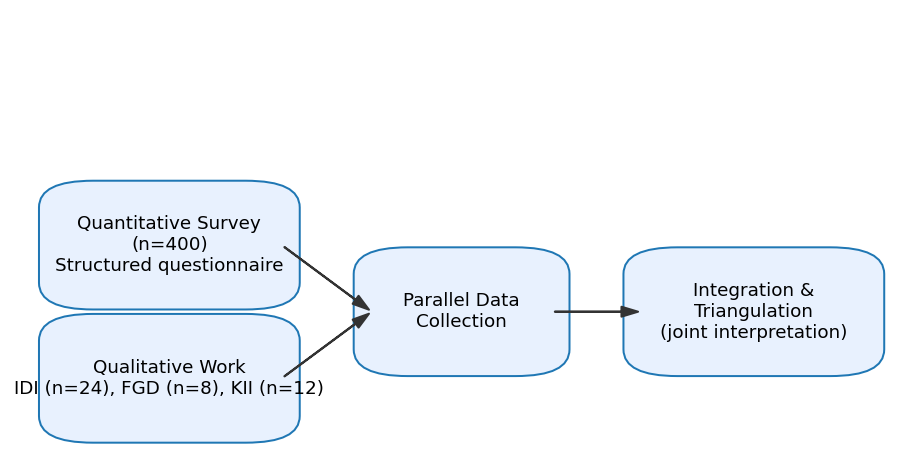

,Component,Details
0,Design,Convergent Mixed-Methods
1,Approach,Parallel quantitative & qualitative strands
2,Quantitative,N≈400; cluster & time-location sampling
3,Qualitative,"IDI=24, FGD=8, KII=12; thematic inquiry"
4,Integration,Joint display & narrative triangulation


Saved: figures/3_2_hotspot_bar.png


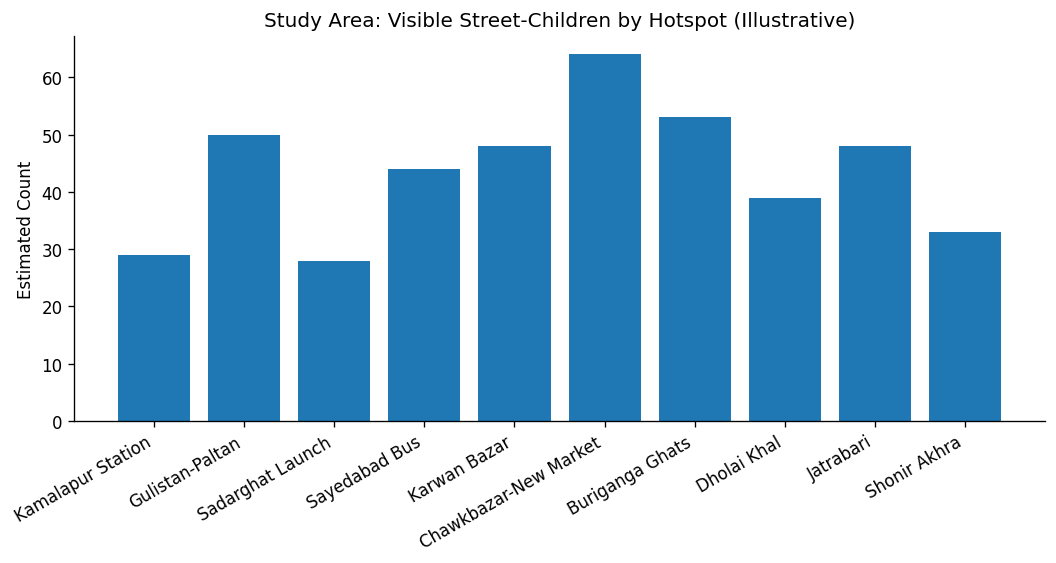

,Hotspot,Estimated_Visible_Children
5,Chawkbazar-New Market,64
6,Buriganga Ghats,53
1,Gulistan-Paltan,50
8,Jatrabari,48
4,Karwan Bazar,48
3,Sayedabad Bus,44
7,Dholai Khal,39
9,Shonir Akhra,33
0,Kamalapur Station,29
2,Sadarghat Launch,28


Saved: figures/3_3_eligibility_donut.png


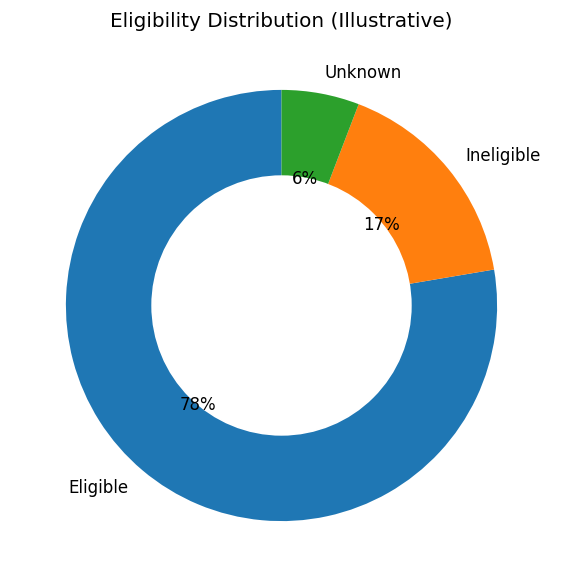

,Category,Count
0,Eligible,400
1,Ineligible,85
2,Unknown,30


Saved: figures/3_4_sample_allocation.png


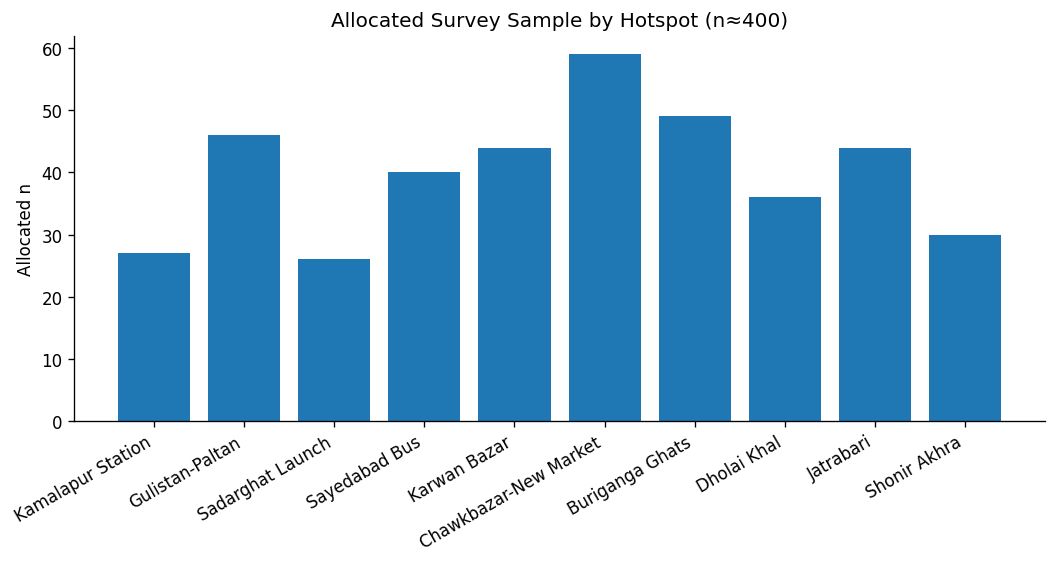

,Hotspot,Allocated_Sample,Weight
0,Kamalapur Station,27,0.066514
1,Gulistan-Paltan,46,0.114679
2,Sadarghat Launch,26,0.064220
3,Sayedabad Bus,40,0.100917
4,Karwan Bazar,44,0.110092
5,Chawkbazar-New Market,59,0.146789
6,Buriganga Ghats,49,0.121560
7,Dholai Khal,36,0.089450
8,Jatrabari,44,0.110092
9,Shonir Akhra,30,0.075688


Saved: figures/3_4_sampling_flow.png


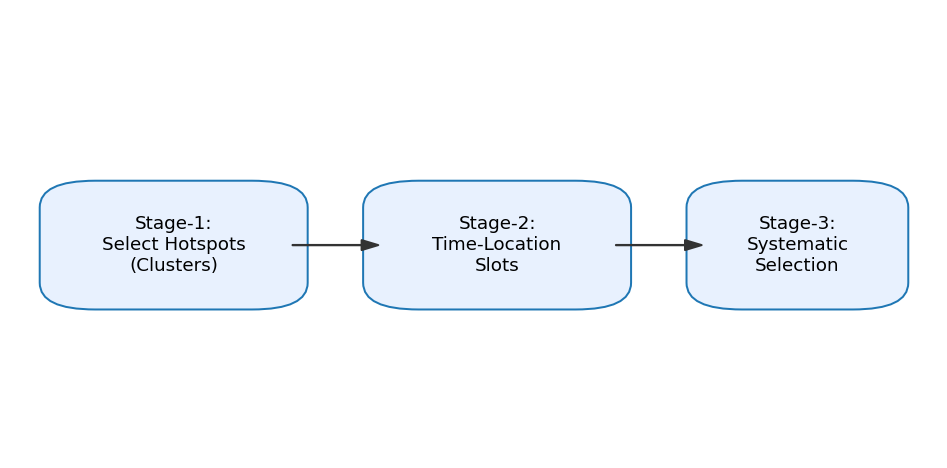

,Module,No_of_Indicators
0,Background,5
1,Housing/Safety,6
2,Education,6
3,Livelihood/Income,7
4,Health,8
5,Food & Nutrition,5
6,Violence/Safeguarding,8
7,Mental Health (8-item),8
8,Service Access,6


Saved: figures/3_5_instrument_heatmap.png


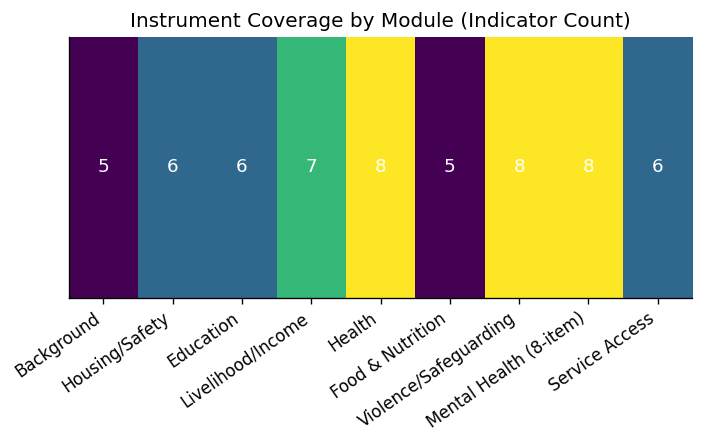

Saved: figures/3_6_time_slots.png


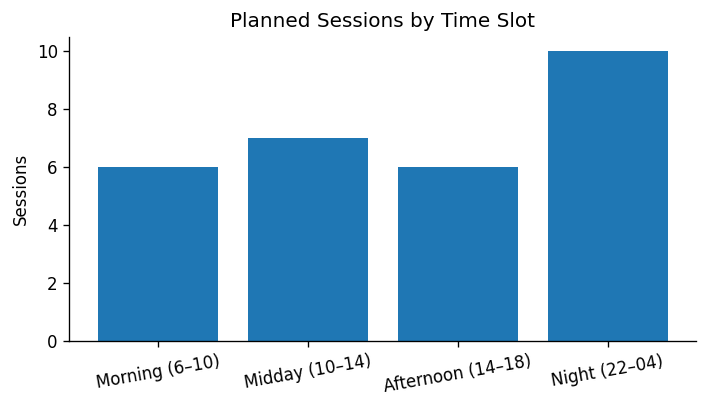

,Slot,Sessions_Planned
0,Morning (6–10),6
1,Midday (10–14),7
2,Afternoon (14–18),6
3,Night (22–04),10


,Task,Start,End,Days
0,Prep & Tooling,2025-02-01,2025-03-01,28
1,Pilot & Training,2025-03-01,2025-03-15,14
2,Main Fieldwork,2025-03-15,2025-04-26,42
3,Cleaning & Analysis,2025-04-26,2025-05-24,28
4,Draft & Validation,2025-05-24,2025-06-07,14


Saved: figures/3_6_gantt.png


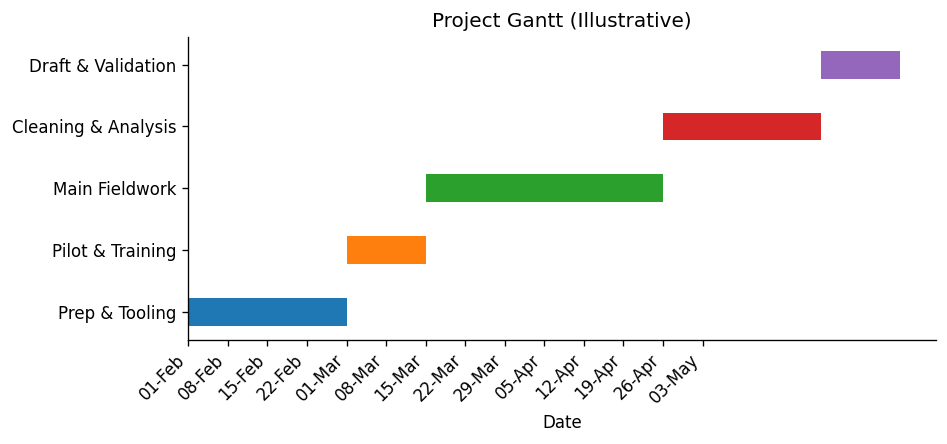

,hotspot,age,sex,hours_work,income_daily,school_ever,school_current,violence_score,mental8_score,dropout
0,Dholai Khal,12,Boy,8.173718,429.884624,1,0,2,12,1
1,Kamalapur Station,6,Boy,4.137218,214.946622,1,0,1,6,1
2,Buriganga Ghats,10,Boy,2.358909,364.823377,1,0,8,12,1
3,Dholai Khal,9,Boy,6.481742,389.101180,1,0,4,10,1
4,Chawkbazar-New Market,6,Boy,6.718768,198.917331,1,0,4,18,1


Saved: figures/3_7_school_by_sex.png


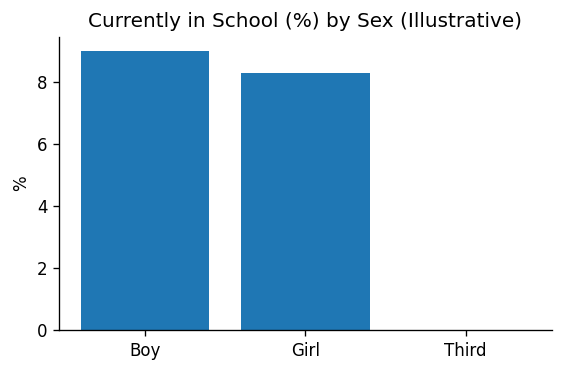

Saved: figures/3_7_scatter_income_hours.png


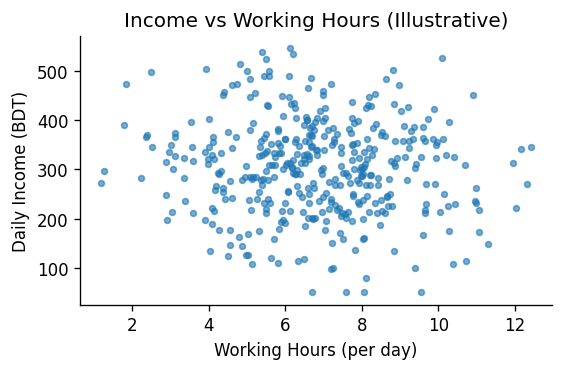

Saved: figures/3_7_corr_matrix.png


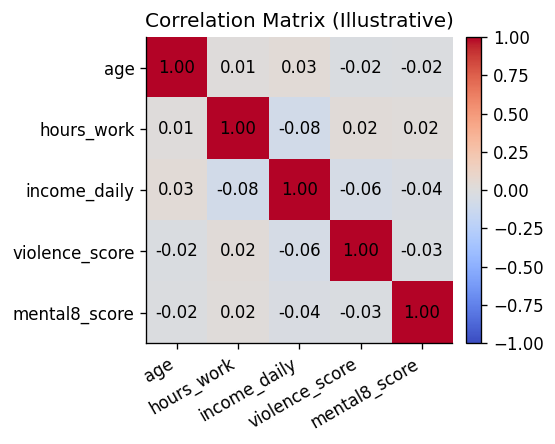

,QA_Step,Coverage_%
0,Enumerator training,100
1,10% duplicate checks,10
2,5% back-check calls,5
3,Daily data audit,100
4,Pilot revision applied,100


Saved: figures/3_8_qa_barh.png


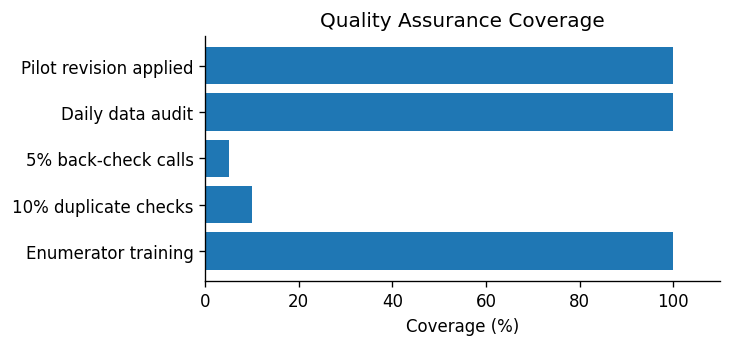

,Domain,Implementation
0,IRB Approval,Institutional approval prior to fieldwork
1,Best Interest Principle,Participant may refuse/skip without consequence
2,Assent/Consent,Assent (12–17) + caregiver verbal where applic...
3,Confidentiality,No direct identifiers; encrypted storage
4,Referral Pathway,Health/violence/shelter partners available 24/7
5,No Cash Incentives,Light snack only; no cash to avoid coercion


Saved: figures/3_9_ethics_check.png


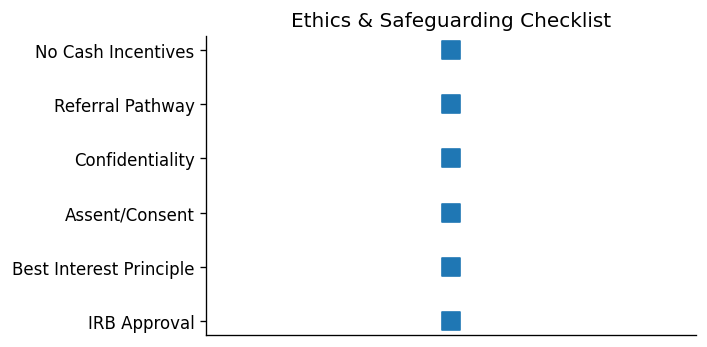

Saved: figures/3_10_timeline_weeks.png


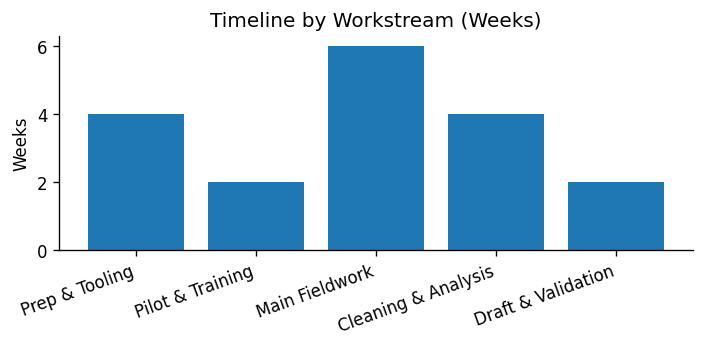

,Task,Start,End,Days
0,Prep & Tooling,2025-02-01,2025-03-01,28
1,Pilot & Training,2025-03-01,2025-03-15,14
2,Main Fieldwork,2025-03-15,2025-04-26,42
3,Cleaning & Analysis,2025-04-26,2025-05-24,28
4,Draft & Validation,2025-05-24,2025-06-07,14


Cronbach's alpha (illustrative): 0.937


,Item,Mean,SD
item1,item1,-0.01,1.21
item2,item2,-0.01,1.22
item3,item3,0.03,1.18
item4,item4,0.00,1.20
item5,item5,-0.01,1.21
item6,item6,0.01,1.18
item7,item7,-0.01,1.25
item8,item8,0.04,1.18


Saved: figures/3_11_alpha_bar.png


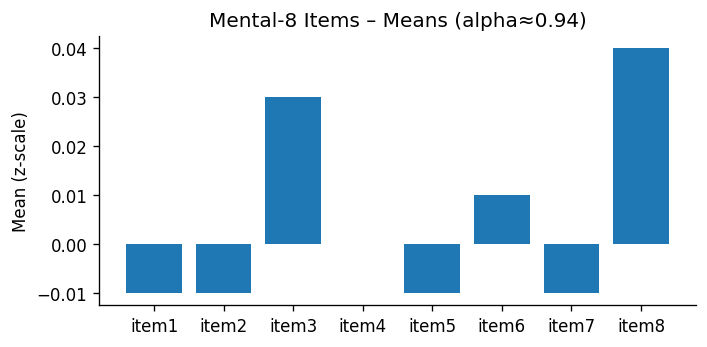

,Limitation,Likelihood,Impact
0,Hidden populations missed,4,4
1,Recall/social desirability bias,3,3
2,Night-time safety constraints,3,4
3,Sensitive topic non-response,2,3
4,Cluster-only generalizability,2,3


Saved: figures/3_12_risk_matrix.png


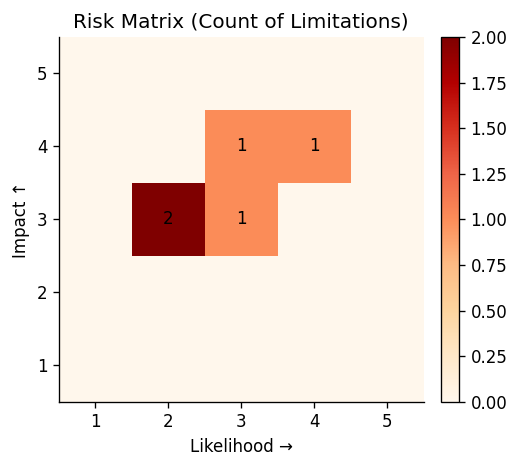

,Activity,Responsible,Accountable,Consulted,Informed
0,Police pre-notice,Field Lead,PI,Police Liaison,"IRB, Sponsor"
1,NGO co-movement,NGO Partner,PI,NGO Focal,"IRB, Sponsor"
2,Team tracking,Ops Manager,PI,DSCC Focal,"IRB, Sponsor"
3,Emergency transport,Ops Manager,PI,DSCC Focal,"IRB, Sponsor"
4,Medical kit,Field Lead,PI,Health Partner,"IRB, Sponsor"


Saved: figures/3_13_risk_raci.png


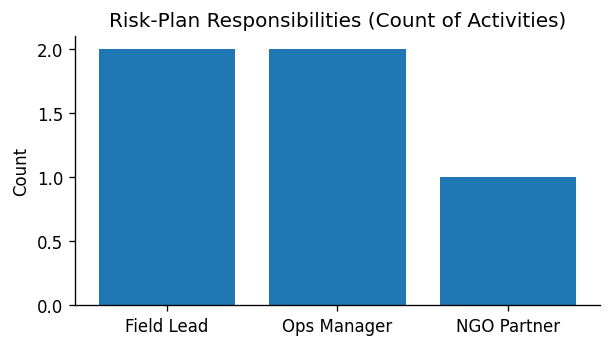

,Theme,Key_Quant,Key_Qual,Policy_Nudge
0,Education,Current schooling 9%,‘Work hours stop us from school; need night cl...,Mobile/bridge schooling near hotspots
1,Violence,Violence score mean 2.5,‘Police & gangs main fear after midnight’,Night safe-spaces & child desk visibility
2,Health,Illness in last 3 months 58%,‘Clinic fees and documents block access’,Free outreach clinics & ID-lite enrolment
3,Income,Median income BDT 300,‘Seasonal shocks change our earnings’,Savings nudges; cash-for-work pilots


Saved: figures/3_14_joint_display_anchor.png


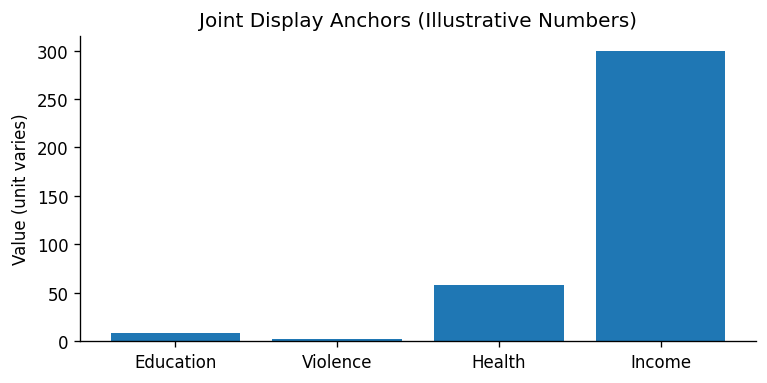


All figures saved in the 'figures' folder. Replace the synthetic data with your real survey once available.



In [3]:
# ==============================
# Chapter 3 – Methodology Visual Pack (3.1–3.14)
# Author: (Your Name)
# Requirements: pandas, numpy, matplotlib
# ==============================

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import FancyBboxPatch, ArrowStyle, FancyArrowPatch
from datetime import datetime, timedelta

# ---- make display() safe outside Jupyter ----
try:
    from IPython.display import display as _ipydisplay
    def display(obj): _ipydisplay(obj)
except Exception:
    def display(obj): 
        # graceful fallback
        try:
            print(obj.to_string() if hasattr(obj, "to_string") else obj)
        except Exception:
            print(obj)

# ---------- setup ----------
plt.rcParams["figure.dpi"] = 120
plt.rcParams["axes.spines.top"] = False
plt.rcParams["axes.spines.right"] = False
os.makedirs("figures", exist_ok=True)

# Small helper to avoid ticklabel warnings
def set_xcats(ax, labels, rotation=0, ha="center"):
    ax.set_xticks(np.arange(len(labels)))
    ax.set_xticklabels(labels, rotation=rotation, ha=ha)

# Synthetic hotspots used throughout (replace with your DSCC list when you have it)
hotspots = [
    "Kamalapur Station", "Gulistan-Paltan", "Sadarghat Launch",
    "Sayedabad Bus", "Karwan Bazar", "Chawkbazar-New Market",
    "Buriganga Ghats", "Dholai Khal", "Jatrabari", "Shonir Akhra"
]

# Helper to show and also save every figure
def save_show(fig, name):
    fig.tight_layout()
    path = f"figures/{name}.png"
    fig.savefig(path, bbox_inches="tight")
    print(f"Saved: {path}")
    plt.show()


# =========================================================
# 3.1 Research Design & Approach (Convergent Mixed-Methods)
# =========================================================
fig, ax = plt.subplots(figsize=(8, 4))
ax.axis("off")

def rounded_box(ax, xy, w, h, text, fc="#e8f1fe"):
    x, y = xy
    box = FancyBboxPatch((x, y), w, h, boxstyle="round,pad=0.02,rounding_size=0.06",
                         linewidth=1.2, edgecolor="#1f77b4", facecolor=fc)
    ax.add_patch(box)
    ax.text(x + w/2, y + h/2, text, ha="center", va="center", fontsize=11)

# Boxes
rounded_box(ax, (0.05, 0.35), 0.25, 0.25, "Quantitative Survey\n(n=400)\nStructured questionnaire")
rounded_box(ax, (0.05, 0.05), 0.25, 0.25, "Qualitative Work\nIDI (n=24), FGD (n=8), KII (n=12)")
rounded_box(ax, (0.40, 0.20), 0.20, 0.25, "Parallel Data\nCollection")
rounded_box(ax, (0.70, 0.20), 0.25, 0.25, "Integration &\nTriangulation\n(joint interpretation)")

def arrow(ax, p1, p2):
    ax.add_patch(FancyArrowPatch(p1, p2, arrowstyle=ArrowStyle("Simple", head_length=10, head_width=6),
                                 connectionstyle="arc3,rad=0.0", color="#333", linewidth=1.2))
arrow(ax, (0.30, 0.475), (0.40, 0.325))
arrow(ax, (0.30, 0.175), (0.40, 0.325))
arrow(ax, (0.60, 0.325), (0.70, 0.325))

ax.set_xlim(0,1); ax.set_ylim(0,1)
save_show(fig, "3_1_design_diagram")

design_tbl = pd.DataFrame({
    "Component": ["Design", "Approach", "Quantitative", "Qualitative", "Integration"],
    "Details": [
        "Convergent Mixed-Methods", 
        "Parallel quantitative & qualitative strands",
        "N≈400; cluster & time-location sampling",
        "IDI=24, FGD=8, KII=12; thematic inquiry",
        "Joint display & narrative triangulation"
    ]
})
display(design_tbl)


# =================================================
# 3.2 Study Area – DSCC Hotspots (Illustrative)
# =================================================
np.random.seed(7)
hotspot_counts = np.random.randint(25, 70, size=len(hotspots))
area_df = pd.DataFrame({"Hotspot": hotspots, "Estimated_Visible_Children": hotspot_counts})

fig, ax = plt.subplots(figsize=(9, 4.8))
ax.bar(np.arange(len(area_df)), area_df["Estimated_Visible_Children"])
ax.set_title("Study Area: Visible Street-Children by Hotspot (Illustrative)")
ax.set_ylabel("Estimated Count")
set_xcats(ax, area_df["Hotspot"], rotation=30, ha="right")
save_show(fig, "3_2_hotspot_bar")

display(area_df.sort_values("Estimated_Visible_Children", ascending=False))


# ==============================================================
# 3.3 Population & Eligibility (Inclusion/Exclusion Illustration)
# ==============================================================
eligible = 400
ineligible = 85
unknown = 30
pop_df = pd.DataFrame({
    "Category": ["Eligible", "Ineligible", "Unknown"],
    "Count": [eligible, ineligible, unknown]
})

fig, ax = plt.subplots(figsize=(5, 5))
vals = pop_df["Count"].values
labels = pop_df["Category"].values
wedges, texts, autotexts = ax.pie(vals, labels=labels, autopct="%1.0f%%", startangle=90)
# donut hole
ax.add_artist(plt.Circle((0,0), 0.6, color="white"))
ax.set_title("Eligibility Distribution (Illustrative)")
save_show(fig, "3_3_eligibility_donut")

display(pop_df)


# ===========================================
# 3.4 Sampling Design & Sample Allocation
# ===========================================
area_df["Weight"] = area_df["Estimated_Visible_Children"] / area_df["Estimated_Visible_Children"].sum()
area_df["Allocated_Sample"] = np.round(area_df["Weight"] * 400).astype(int)

fig, ax = plt.subplots(figsize=(9, 4.8))
ax.bar(np.arange(len(area_df)), area_df["Allocated_Sample"])
ax.set_title("Allocated Survey Sample by Hotspot (n≈400)")
ax.set_ylabel("Allocated n")
set_xcats(ax, area_df["Hotspot"], rotation=30, ha="right")
save_show(fig, "3_4_sample_allocation")

display(area_df[["Hotspot","Allocated_Sample","Weight"]])

# Flow figure
fig, ax = plt.subplots(figsize=(8, 4))
ax.axis("off")
rounded_box(ax, (0.05, 0.35), 0.25, 0.25, "Stage-1:\nSelect Hotspots\n(Clusters)")
rounded_box(ax, (0.40, 0.35), 0.25, 0.25, "Stage-2:\nTime-Location\nSlots")
rounded_box(ax, (0.75, 0.35), 0.20, 0.25, "Stage-3:\nSystematic\nSelection")
arrow(ax, (0.30, 0.475), (0.40, 0.475))
arrow(ax, (0.65, 0.475), (0.75, 0.475))
save_show(fig, "3_4_sampling_flow")


# =======================================================
# 3.5 Instruments & Variables – Heatmap-style overview
# =======================================================
modules = ["Background","Housing/Safety","Education","Livelihood/Income",
           "Health","Food & Nutrition","Violence/Safeguarding",
           "Mental Health (8-item)","Service Access"]
indicators = [5, 6, 6, 7, 8, 5, 8, 8, 6]

inst_df = pd.DataFrame({"Module": modules, "No_of_Indicators": indicators})
display(inst_df)

fig, ax = plt.subplots(figsize=(6, 3.8))
heat = np.array(indicators)[None, :]
im = ax.imshow(heat, aspect="auto")
ax.set_yticks([])
ax.set_title("Instrument Coverage by Module (Indicator Count)")
ax.set_xticks(np.arange(len(modules)))
ax.set_xticklabels(modules, rotation=35, ha="right")
for i, val in enumerate(indicators):
    ax.text(i, 0, str(val), ha="center", va="center", color="white", fontsize=11)
save_show(fig, "3_5_instrument_heatmap")


# ==============================================
# 3.6 Field Process – Time/Task & Daily Slots
# ==============================================
slots = ["Morning (6–10)", "Midday (10–14)", "Afternoon (14–18)", "Night (22–04)"]
coverage = [6, 7, 6, 10]
proc_df = pd.DataFrame({"Slot": slots, "Sessions_Planned": coverage})

fig, ax = plt.subplots(figsize=(6, 3.5))
ax.bar(np.arange(len(slots)), coverage)
ax.set_title("Planned Sessions by Time Slot")
ax.set_ylabel("Sessions")
set_xcats(ax, slots, rotation=10, ha="center")
save_show(fig, "3_6_time_slots")

display(proc_df)

# Simple Gantt
tasks = ["Prep & Tooling", "Pilot & Training", "Main Fieldwork", "Cleaning & Analysis", "Draft & Validation"]
start = datetime(2025, 2, 1)
dur_days = [28, 14, 42, 28, 14]
bars = []
s = start
for d in dur_days:
    bars.append((s, s + timedelta(days=d)))
    s = s + timedelta(days=d)

g_df = pd.DataFrame({"Task": tasks, "Start": [b[0] for b in bars], "End": [b[1] for b in bars]})
g_df["Days"] = (g_df["End"] - g_df["Start"]).dt.days
display(g_df)

fig, ax = plt.subplots(figsize=(8, 3.8))
for i, row in g_df.iterrows():
    ax.barh(row["Task"], row["Days"], left=row["Start"].toordinal(), height=0.45)
ax.set_title("Project Gantt (Illustrative)")
ax.set_xlabel("Date")
xt = [start + timedelta(days=7*k) for k in range(0, 14)]
ax.set_xticks([x.toordinal() for x in xt])
ax.set_xticklabels([x.strftime("%d-%b") for x in xt], rotation=45, ha="right")
save_show(fig, "3_6_gantt")


# ===========================================
# 3.7 Analysis Plan – Examples & Mock Output
# ===========================================
np.random.seed(10)
N = 400
mock = pd.DataFrame({
    "hotspot": np.random.choice(hotspots, size=N, p=(area_df["Weight"].values)),
    "age": np.random.randint(6, 18, size=N),
    "sex": np.random.choice(["Boy","Girl","Third"], size=N, p=[0.74,0.23,0.03]),
    "hours_work": np.random.normal(7.0, 2.0, size=N).clip(0, 16),
    "income_daily": np.random.normal(300, 90, size=N).clip(50, 800),
    "school_ever": np.random.choice([0,1], size=N, p=[0.35,0.65]),
    "school_current": np.random.choice([0,1], size=N, p=[0.91,0.09]),
    "violence_score": np.random.poisson(2.5, size=N),
    "mental8_score": np.random.randint(2, 20, size=N)
})
mock["dropout"] = np.where((mock["school_ever"]==1) & (mock["school_current"]==0), 1, 0)

display(mock.head())

# Bar: current schooling by sex
agg = mock.groupby("sex")["school_current"].mean().mul(100).round(1)
fig, ax = plt.subplots(figsize=(4.8,3.2))
ax.bar(np.arange(len(agg.index)), agg.values)
ax.set_title("Currently in School (%) by Sex (Illustrative)")
ax.set_ylabel("%")
set_xcats(ax, list(agg.index))
save_show(fig, "3_7_school_by_sex")

# Scatter: income vs work hours
fig, ax = plt.subplots(figsize=(4.8,3.2))
ax.scatter(mock["hours_work"], mock["income_daily"], s=12, alpha=0.6)
ax.set_xlabel("Working Hours (per day)")
ax.set_ylabel("Daily Income (BDT)")
ax.set_title("Income vs Working Hours (Illustrative)")
save_show(fig, "3_7_scatter_income_hours")

# Correlation heat
corr_vars = mock[["age","hours_work","income_daily","violence_score","mental8_score"]].corr()
fig, ax = plt.subplots(figsize=(4.5,3.8))
im = ax.imshow(corr_vars, vmin=-1, vmax=1, cmap="coolwarm")
ax.set_xticks(np.arange(corr_vars.shape[0]))
ax.set_xticklabels(corr_vars.columns, rotation=30, ha="right")
ax.set_yticks(np.arange(corr_vars.shape[0]))
ax.set_yticklabels(corr_vars.columns)
for i in range(corr_vars.shape[0]):
    for j in range(corr_vars.shape[1]):
        ax.text(j, i, f"{corr_vars.iloc[i,j]:.2f}", ha="center", va="center", color="black")
ax.set_title("Correlation Matrix (Illustrative)")
fig.colorbar(im, ax=ax, fraction=0.046, pad=0.04)
save_show(fig, "3_7_corr_matrix")


# ===========================================
# 3.8 Quality Assurance – Coverage Plots
# ===========================================
qa_df = pd.DataFrame({
    "QA_Step": ["Enumerator training", "10% duplicate checks", "5% back-check calls", "Daily data audit", "Pilot revision applied"],
    "Coverage_%": [100, 10, 5, 100, 100]
})
display(qa_df)

fig, ax = plt.subplots(figsize=(6.2,3))
ax.barh(qa_df["QA_Step"], qa_df["Coverage_%"])
ax.set_xlim(0, 110)
ax.set_xlabel("Coverage (%)")
ax.set_title("Quality Assurance Coverage")
save_show(fig, "3_8_qa_barh")


# ===========================================
# 3.9 Ethics & Child Safeguarding – Table
# ===========================================
ethics_df = pd.DataFrame({
    "Domain": ["IRB Approval", "Best Interest Principle", "Assent/Consent", "Confidentiality", "Referral Pathway", "No Cash Incentives"],
    "Implementation": [
        "Institutional approval prior to fieldwork",
        "Participant may refuse/skip without consequence",
        "Assent (12–17) + caregiver verbal where applicable",
        "No direct identifiers; encrypted storage",
        "Health/violence/shelter partners available 24/7",
        "Light snack only; no cash to avoid coercion"
    ]
})
display(ethics_df)

fig, ax = plt.subplots(figsize=(6,3))
y = np.arange(len(ethics_df))
ax.scatter(np.ones_like(y), y, s=120, marker="s")
ax.set_yticks(y); ax.set_yticklabels(ethics_df["Domain"])
ax.set_xlim(0.5, 1.5); ax.set_xticks([])
ax.set_title("Ethics & Safeguarding Checklist")
save_show(fig, "3_9_ethics_check")


# ===========================================
# 3.10 Timeline – Weeks (Gantt already made)
# ===========================================
fig, ax = plt.subplots(figsize=(6,3))
weeks = (g_df["Days"]/7).round(1)
ax.bar(np.arange(len(g_df["Task"])), weeks)
ax.set_ylabel("Weeks")
ax.set_title("Timeline by Workstream (Weeks)")
set_xcats(ax, list(g_df["Task"]), rotation=20, ha="right")
save_show(fig, "3_10_timeline_weeks")

display(g_df[["Task","Start","End","Days"]])


# ===========================================
# 3.11 Reliability & Validity – Alpha demo
# ===========================================
np.random.seed(11)
true_trait = np.random.normal(0, 1, size=N)
items = {}
for k in range(1,9):
    noise = np.random.normal(0, 0.7, size=N)
    items[f"item{k}"] = (true_trait + noise)

scale_df = pd.DataFrame(items)

cov = scale_df.cov().values
kitems = cov.shape[0]
alpha = (kitems/(kitems-1)) * (1 - (np.trace(cov) / cov.sum()))
print(f"Cronbach's alpha (illustrative): {alpha:.3f}")

stats = pd.DataFrame({
    "Item": scale_df.columns,
    "Mean": scale_df.mean().round(2),
    "SD": scale_df.std().round(2)
})
display(stats)

fig, ax = plt.subplots(figsize=(6,3))
ax.bar(np.arange(len(stats["Item"])), stats["Mean"])
ax.set_title(f"Mental-8 Items – Means (alpha≈{alpha:.2f})")
ax.set_ylabel("Mean (z-scale)")
set_xcats(ax, list(stats["Item"]))
save_show(fig, "3_11_alpha_bar")


# ===========================================
# 3.12 Limitations – Risk Matrix
# ===========================================
limits = pd.DataFrame({
    "Limitation": [
        "Hidden populations missed",
        "Recall/social desirability bias",
        "Night-time safety constraints",
        "Sensitive topic non-response",
        "Cluster-only generalizability"
    ],
    "Likelihood": [4, 3, 3, 2, 2],
    "Impact": [4, 3, 4, 3, 3]
})
display(limits)

mat = np.zeros((5,5))
for _, r in limits.iterrows():
    mat[r["Impact"]-1, r["Likelihood"]-1] += 1

fig, ax = plt.subplots(figsize=(4.5,4))
im = ax.imshow(mat, cmap="OrRd", origin="lower")
ax.set_xlabel("Likelihood →")
ax.set_ylabel("Impact ↑")
ax.set_xticks(range(5)); ax.set_yticks(range(5))
ax.set_xticklabels([1,2,3,4,5]); ax.set_yticklabels([1,2,3,4,5])
for i in range(5):
    for j in range(5):
        if mat[i,j] > 0:
            ax.text(j, i, int(mat[i,j]), ha="center", va="center")
ax.set_title("Risk Matrix (Count of Limitations)")
fig.colorbar(im, ax=ax, fraction=0.046, pad=0.04)
save_show(fig, "3_12_risk_matrix")


# ===========================================
# 3.13 Risk Management & Safety Plan
# ===========================================
raci = pd.DataFrame({
    "Activity": ["Police pre-notice", "NGO co-movement", "Team tracking", "Emergency transport", "Medical kit"],
    "Responsible": ["Field Lead", "NGO Partner", "Ops Manager", "Ops Manager", "Field Lead"],
    "Accountable": ["PI", "PI", "PI", "PI", "PI"],
    "Consulted": ["Police Liaison", "NGO Focal", "DSCC Focal", "DSCC Focal", "Health Partner"],
    "Informed": ["IRB, Sponsor", "IRB, Sponsor", "IRB, Sponsor", "IRB, Sponsor", "IRB, Sponsor"]
})
display(raci)

fig, ax = plt.subplots(figsize=(5.2,3))
counts = raci["Responsible"].value_counts()
ax.bar(np.arange(len(counts.index)), counts.values)
ax.set_title("Risk-Plan Responsibilities (Count of Activities)")
ax.set_ylabel("Count")
set_xcats(ax, list(counts.index))
save_show(fig, "3_13_risk_raci")


# ===========================================
# 3.14 Reporting & Knowledge Products
# ===========================================
joint = pd.DataFrame({
    "Theme": ["Education", "Violence", "Health", "Income"],
    "Key_Quant": ["Current schooling 9%", "Violence score mean 2.5", "Illness in last 3 months 58%", "Median income BDT 300"],
    "Key_Qual": [
        "‘Work hours stop us from school; need night classes’",
        "‘Police & gangs main fear after midnight’",
        "‘Clinic fees and documents block access’",
        "‘Seasonal shocks change our earnings’"
    ],
    "Policy_Nudge": [
        "Mobile/bridge schooling near hotspots",
        "Night safe-spaces & child desk visibility",
        "Free outreach clinics & ID-lite enrolment",
        "Savings nudges; cash-for-work pilots"
    ]
})
display(joint)

fig, ax = plt.subplots(figsize=(6.5,3.3))
themes = joint["Theme"]
vals = [9, 2.5, 58, 300]  # illustrative anchors only
ax.bar(np.arange(len(themes)), vals)
ax.set_title("Joint Display Anchors (Illustrative Numbers)")
ax.set_ylabel("Value (unit varies)")
set_xcats(ax, list(themes))
save_show(fig, "3_14_joint_display_anchor")

print("\nAll figures saved in the 'figures' folder. Replace the synthetic data with your real survey once available.\n")
